<a href="https://colab.research.google.com/github/iamswapnil22/Machine-Learning/blob/main/Unsupervised%20Learning%20-%20Clustering/Retail_Business_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as rd
import seaborn as sns

In [4]:
df = pd.read_csv("/content/OnlineRetail.csv",encoding='unicode_escape')
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,01-12-2010 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2.0,01-12-2010 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6.0,01-12-2010 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6.0,01-12-2010 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6.0,01-12-2010 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32.0,01-12-2010 08:34,1.69,13047.0,United Kingdom


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,74292.000000,74292.000000,46204.000000
mean,8.312550,5.659764,15351.134794
std,388.608396,137.089099,1765.264909
min,-74215.000000,0.000000,12346.000000
25%,1.000000,1.250000,13959.000000
50%,2.000000,2.510000,15311.000000
75%,8.000000,4.210000,16943.000000
max,74215.000000,16888.020000,18283.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74293 entries, 0 to 74292
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    74293 non-null  object 
 1   StockCode    74293 non-null  object 
 2   Description  74104 non-null  object 
 3   Quantity     74292 non-null  float64
 4   InvoiceDate  74292 non-null  object 
 5   UnitPrice    74292 non-null  float64
 6   CustomerID   46204 non-null  float64
 7   Country      74292 non-null  object 
dtypes: float64(3), object(5)
memory usage: 4.5+ MB


In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46204 entries, 0 to 74291
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    46204 non-null  object 
 1   StockCode    46204 non-null  object 
 2   Description  46204 non-null  object 
 3   Quantity     46204 non-null  float64
 4   InvoiceDate  46204 non-null  object 
 5   UnitPrice    46204 non-null  float64
 6   CustomerID   46204 non-null  float64
 7   Country      46204 non-null  object 
dtypes: float64(3), object(5)
memory usage: 3.2+ MB


In [10]:
df.shape

(46204, 8)

In [11]:
df['CustomerID'] = df['CustomerID'].astype(str)
df['Amount'] = df['Quantity']*df['UnitPrice']
print(df['Amount'])
rfm_df_m = df.groupby('CustomerID')['Amount'].sum()
rfm_df_m = rfm_df_m.reset_index()
rfm_df_m.columns = ['CustomerID','Amount']
print("\n\n",rfm_df_m)

0        15.30
1        20.34
2        22.00
3        20.34
4        20.34
         ...  
74285    -3.75
74286    -2.50
74289     3.75
74290     3.30
74291     8.40
Name: Amount, Length: 46204, dtype: float64


      CustomerID   Amount
0       12346.0     0.00
1       12347.0  1187.18
2       12348.0  1120.24
3       12356.0  2271.62
4       12359.0   547.50
...         ...      ...
1321    18259.0   376.30
1322    18260.0   769.52
1323    18269.0   138.90
1324    18277.0   -12.75
1325    18283.0   215.00

[1326 rows x 2 columns]


In [12]:
rfm_df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  1326 non-null   object 
 1   Amount      1326 non-null   float64
dtypes: float64(1), object(1)
memory usage: 20.8+ KB


In [13]:
rfm_ds_f = df.groupby('CustomerID')['InvoiceNo'].count()
rfm_ds_f = rfm_ds_f.reset_index()
rfm_ds_f.columns = ['CustomerID', 'Frequency']
print(rfm_ds_f)

     CustomerID  Frequency
0       12346.0          2
1       12347.0         60
2       12348.0         23
3       12356.0         36
4       12359.0         16
...         ...        ...
1321    18259.0          7
1322    18260.0         40
1323    18269.0          8
1324    18277.0          1
1325    18283.0        102

[1326 rows x 2 columns]


In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%d-%m-%Y %H:%M')
max_date = max(df['InvoiceDate'])
df['Diff'] = max_date - df['InvoiceDate']
rfm_ds_p = df.groupby('CustomerID')['Diff'].min()
rfm_ds_p = rfm_ds_p.reset_index()
rfm_ds_p.columns = ['CustomerID','Diff']
rfm_ds_p['Diff'] = rfm_ds_p['Diff'].dt.days
print(rfm_ds_p)

     CustomerID  Diff
0       12346.0     9
1       12347.0     1
2       12348.0     2
3       12356.0     9
4       12359.0    15
...         ...   ...
1321    18259.0    50
1322    18260.0     6
1323    18269.0    42
1324    18277.0     2
1325    18283.0     4

[1326 rows x 2 columns]


In [15]:
rfm_ds_final = pd.merge(rfm_df_m,rfm_ds_f,on='CustomerID',how='inner')
rfm_ds_final = pd.merge(rfm_ds_final,rfm_ds_p,on='CustomerID',how='inner')
rfm_ds_final.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
print(rfm_ds_final.head())

  CustomerID   Amount  Frequency  Recency
0    12346.0     0.00          2        9
1    12347.0  1187.18         60        1
2    12348.0  1120.24         23        2
3    12356.0  2271.62         36        9
4    12359.0   547.50         16       15


In [16]:
Q1 = rfm_ds_final.Amount.quantile(0.05)
Q3 = rfm_ds_final.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm_ds_final = rfm_ds_final[(rfm_ds_final.Amount >= Q1 - 1.5*IQR) & (rfm_ds_final.Amount <= Q3 + 1.5*IQR)]

Q1 = rfm_ds_final.Recency.quantile(0.05)
Q3 = rfm_ds_final.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm_ds_final = rfm_ds_final[(rfm_ds_final.Recency >= Q1 - 1.5*IQR) & (rfm_ds_final.Recency <= Q3 + 1.5*IQR)]

Q1 = rfm_ds_final.Frequency.quantile(0.05)
Q3 = rfm_ds_final.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm_ds_final = rfm_ds_final[(rfm_ds_final.Frequency >= Q1 - 1.5*IQR) & (rfm_ds_final.Frequency <= Q3 + 1.5*IQR)]

In [17]:
print(rfm_ds_final.shape)


(1298, 4)


In [18]:
from sklearn.preprocessing import MinMaxScaler
X = rfm_ds_final[['Amount','Frequency','Recency']]
scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)

In [19]:
rfm_ds_scaled = pd.DataFrame(scaled)
rfm_ds_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_ds_scaled.head()

,Amount,Frequency,Recency
0,0.182460,0.004149,0.157895
1,0.364152,0.244813,0.017544
2,0.353907,0.091286,0.035088
3,0.530120,0.145228,0.157895
4,0.266252,0.062241,0.263158


In [20]:
from sklearn.metrics import silhouette_score

In [21]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3,max_iter=50)
kmeans.fit(rfm_ds_scaled)
lbs = kmeans.labels_
print(kmeans.labels_)

[2 0 2 ... 1 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

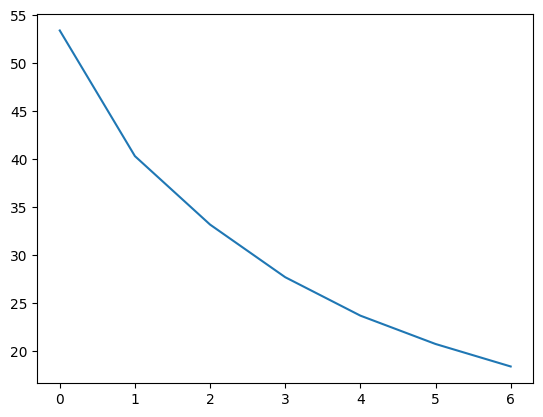

In [22]:
#wss
wss = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_ds_scaled)
    wss.append(kmeans.inertia_)

plt.plot(wss)

In [23]:
#silhouette score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_ds_scaled)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(rfm_ds_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=2, the silhouette score is 0.641010915310981
For n_clusters=3, the silhouette score is 0.5488265811887185
For n_clusters=4, the silhouette score is 0.4936786062783052
For n_clusters=5, the silhouette score is 0.37424992903198173


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=6, the silhouette score is 0.39733127625342546
For n_clusters=7, the silhouette score is 0.3949801494770546


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters=8, the silhouette score is 0.4020127430066274


In [24]:
# kmeans = KMeans(n_clusters=3, max_iter=50)
# kmeans.fit(rfm_ds_scaled)
# print(kmeans.labels_)
rfm_ds_final['Cluster_Id'] = lbs
rfm_ds_final.head()

,CustomerID,Amount,Frequency,Recency,Cluster_Id
0,12346.0,0.00,2,9,2
1,12347.0,1187.18,60,1,0
2,12348.0,1120.24,23,2,2
3,12356.0,2271.62,36,9,0
4,12359.0,547.50,16,15,2


<Axes: xlabel='Cluster_Id', ylabel='Amount'>

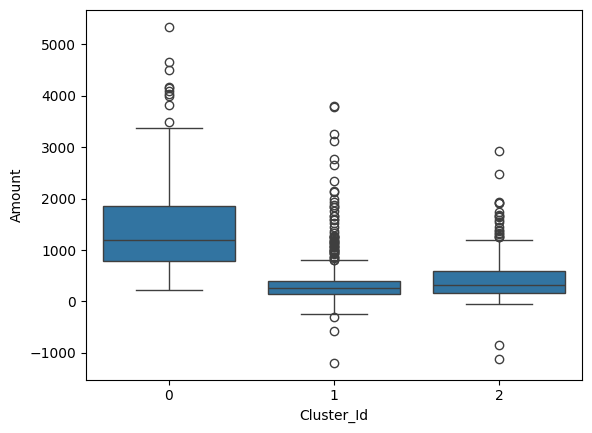

In [26]:
sns.boxplot(x='Cluster_Id', y='Amount', data=rfm_ds_final)

<Axes: xlabel='Cluster_Id', ylabel='Frequency'>

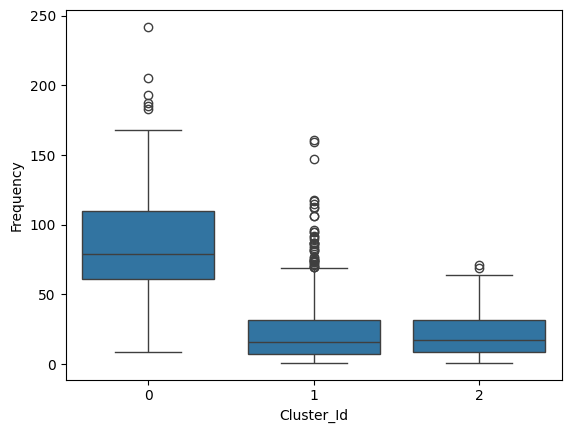

In [27]:
sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm_ds_final)


<Axes: xlabel='Cluster_Id', ylabel='Recency'>

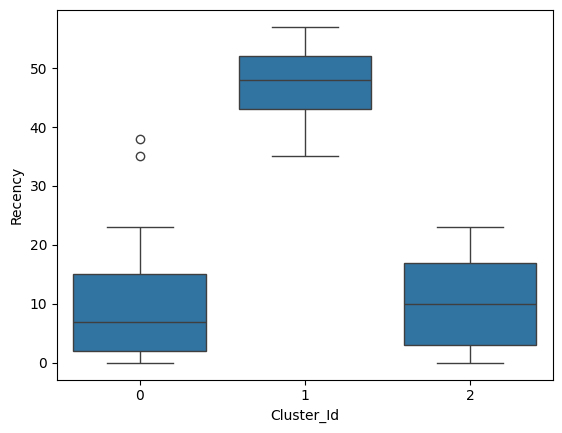

In [28]:
sns.boxplot(x='Cluster_Id', y='Recency', data=rfm_ds_final)
